In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


telco = pd.read_csv('./telco_2_end.csv')
print(telco.shape)
telco.head()

(3333, 20)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,no,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,no,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,no,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,yes,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,yes,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,1.544628


In [61]:
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']


In [62]:
telco.Intl_Plan = telco.Intl_Plan.replace({'no': 0, 'yes': 1})
telco[features].head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [63]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression(max_iter=10000)
telco1 = telco.iloc[:-15,:].copy()
new_customer = telco.iloc[-15:,:]
# Fit the classifier
clf.fit(telco1[features], telco1['Churn'])
# Predict the label of new_customer
print(clf.predict(new_customer[features]))

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


In [64]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco1[features], telco1['Churn'])
# Predict the label of new_customer
print(clf.predict(new_customer[features]))

[0 0 1 0 1 1 0 0 0 1 0 0 0 0 0]


In [65]:
telco.select_dtypes(include='object').columns
telco.drop(['State'], axis=1, inplace=True, errors='ignore')

In [66]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
print(
    X_train.shape,
    X_test.shape,
    y_train.shape,
    y_test.shape
)

(2333, 18) (1000, 18) (2333,) (1000,)


In [72]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, clf.predict(X_test)),'\n',
classification_report(y_test, clf.predict(X_test)))

0.961
[[852   3]
 [ 36 109]] 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       855
           1       0.97      0.75      0.85       145

    accuracy                           0.96      1000
   macro avg       0.97      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000



In [75]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[567   4]
 [ 36  60]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       571
           1       0.94      0.62      0.75        96

    accuracy                           0.94       667
   macro avg       0.94      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667



In [76]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

from sklearn.metrics import precision_score


# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
precision = precision_score(y_test, y_pred)

print("Precision score: {}".format(precision))


Precision score: 0.9032258064516129


In [77]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

0.975609756097561


In [78]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.6976744186046512


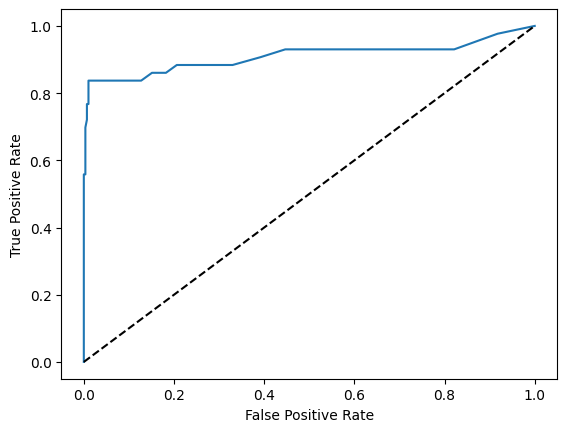

In [79]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [80]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9097338767681611


 This indicates that this baseline random forest classifier is quite good!

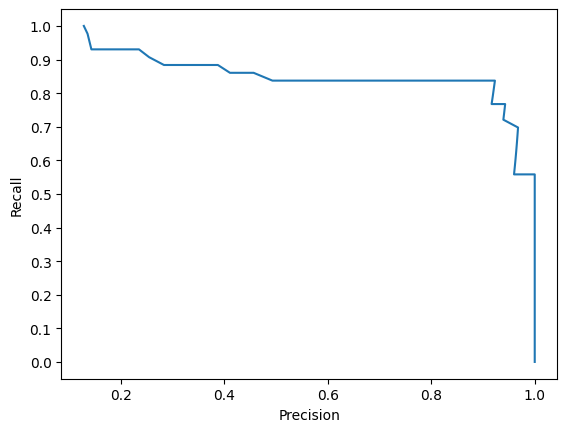

In [84]:
# Precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


In [85]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.8266666666666667
